Car insurance company data - building logistic regression model

This data set contains information about car insurance company customers stanting from their age, gender, driving experience, education and income and many mor features than we need to use to build a model that should idealy predict claims.
In this project, we are trying to handel our dataset to extract the best and worest performing featurs after building the model, vaidate it and check the accuracy.

# Importing libraries

In [48]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [49]:
# Importing dataset
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('/Users/wisthof/Downloads/workspace 4/car_insurance.csv')

In [50]:
df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


# Data Preprocessing

In [51]:
# Dropping id column
df = df.drop('id', axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  int64  
 1   gender               10000 non-null  int64  
 2   driving_experience   10000 non-null  object 
 3   education            10000 non-null  object 
 4   income               10000 non-null  object 
 5   credit_score         9018 non-null   float64
 6   vehicle_ownership    10000 non-null  float64
 7   vehicle_year         10000 non-null  object 
 8   married              10000 non-null  float64
 9   children             10000 non-null  float64
 10  postal_code          10000 non-null  int64  
 11  annual_mileage       9043 non-null   float64
 12  vehicle_type         10000 non-null  object 
 13  speeding_violations  10000 non-null  int64  
 14  duis                 10000 non-null  int64  
 15  past_accidents       10000 non-null  

In [53]:
# handeling missing values
# Fill missing values with the mean
df['credit_score'] = df['credit_score'].astype(float)
df['annual_mileage'] = df['annual_mileage'].astype(float)
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].mean())
df['annual_mileage'] = df['annual_mileage'].fillna(df['annual_mileage'].mean())

In [54]:
# Encoding categorical features

# creating list of features
features = ['driving_experience', 
            'education', 
            'income', 
            'vehicle_year', 
            'postal_code', 
            'vehicle_type']

# Encoding using get_dummies
df_encoded = pd.get_dummies(df, columns=features, drop_first=True)
bool_columns = df_encoded.select_dtypes(include=[bool]).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

# printing to double check results
print(df_encoded.head())

   age  gender  credit_score  vehicle_ownership  married  children  \
0    3       0      0.629027                1.0      0.0       1.0   
1    0       1      0.357757                0.0      0.0       0.0   
2    0       0      0.493146                1.0      0.0       0.0   
3    0       1      0.206013                1.0      0.0       1.0   
4    1       1      0.388366                1.0      0.0       0.0   

   annual_mileage  speeding_violations  duis  past_accidents  outcome  \
0         12000.0                    0     0               0      0.0   
1         16000.0                    0     0               0      1.0   
2         11000.0                    0     0               0      0.0   
3         11000.0                    0     0               0      0.0   
4         12000.0                    2     0               1      1.0   

   driving_experience_10-19y  driving_experience_20-29y  \
0                          0                          0   
1                     

In [55]:
# Finalizing data types transformation
df_encoded[['vehicle_ownership', 'married', 'children', 'outcome']] = df_encoded[['vehicle_ownership', 
                                                                                  'married', 
                                                                                  'children',
                                                                                  'outcome']].astype(int)

# Splitting the data to train, test sets

In [56]:
# Importing train test split
from sklearn.model_selection import train_test_split

# Splitting data
X = df_encoded.drop('outcome', axis=1)
y = df_encoded['outcome']

# Preparing train and test sets of X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

# Double checking shape of sets
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7000, 23) (3000, 23)
(7000,) (3000,)


# Checking the feature relations

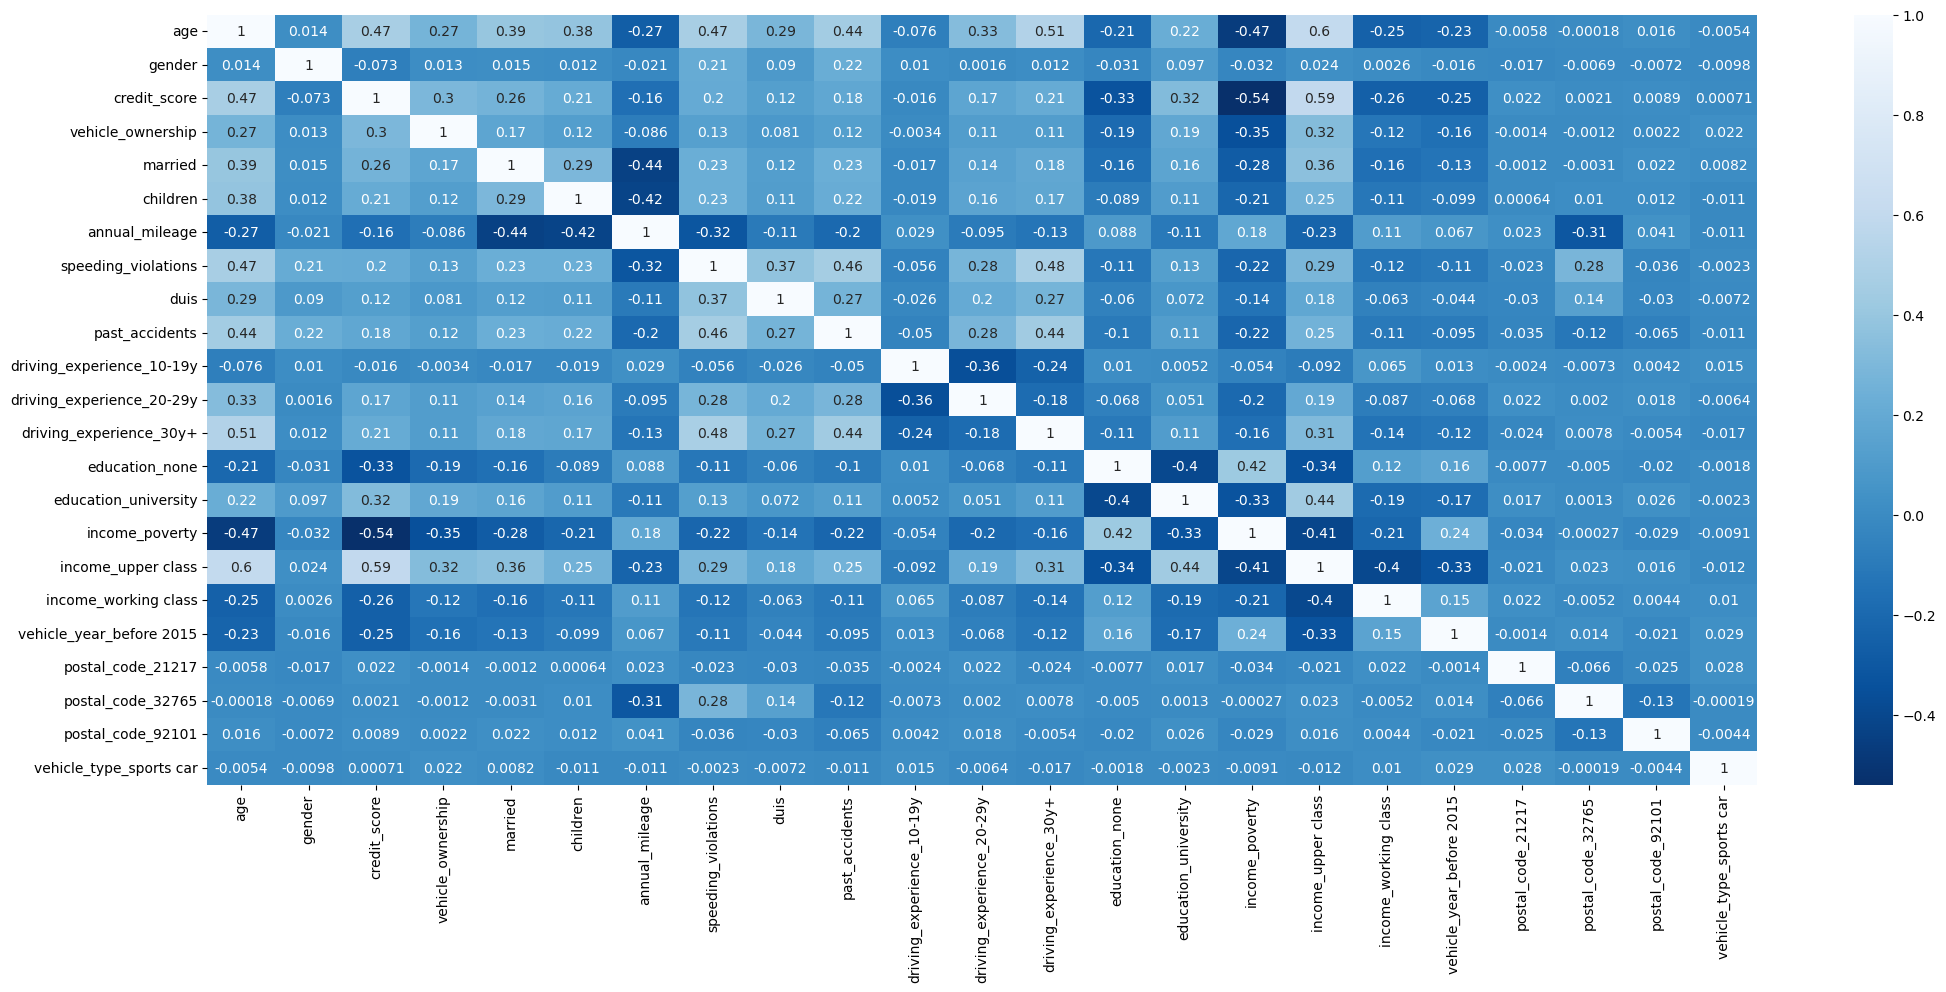

In [57]:
# Using pearson correlation to check if any of the features are highly correlated above 70%

plt.figure(figsize=(25,10))
cor = X_train.corr()

# Plotting it into heatmap 
sns.heatmap(cor, annot= True, cmap=plt.cm.Blues_r)
plt.show()

Based on the plot, we notice that there are no significant coorelations between features

In [58]:
# Checking Vairance inflation for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating df 
vif = pd.DataFrame()

# Creating feature name column
vif["Features"] = X_train.columns

# Creating VIF column and looping over features to apply VIF
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif)

                     Features        VIF
0                         age   9.575588
1                      gender   2.333019
2                credit_score  22.749921
3           vehicle_ownership   3.916863
4                     married   2.635934
5                    children   3.970695
6              annual_mileage  18.549422
7         speeding_violations   3.223304
8                        duis   1.484732
9              past_accidents   2.643313
10  driving_experience_10-19y   2.672845
11  driving_experience_20-29y   3.637260
12    driving_experience_30y+   4.060320
13             education_none   1.722571
14       education_university   2.307428
15             income_poverty   2.704117
16         income_upper class   4.370876
17       income_working class   1.891064
18   vehicle_year_before 2015   3.688615
19          postal_code_21217   1.027515
20          postal_code_32765   1.686262
21          postal_code_92101   1.083958
22    vehicle_type_sports car   1.052782


Some features has extreme VIF values which will require transformation using standard scaler

# Transforming extreme VIF features

In [59]:
# Tranformation for some of the features 
from sklearn.preprocessing import StandardScaler

# List of features to transform
features_to_transform = ['annual_mileage', 'speeding_violations', 'past_accidents', 'age', 'credit_score']

# Now apply StandardScaler
scaler = StandardScaler()
X_train[features_to_transform] = scaler.fit_transform(X_train[features_to_transform])
X_test[features_to_transform] = scaler.transform(X_test[features_to_transform])

# Check the transformed and scaled features
print(X_train[features_to_transform].head())
print(X_test[features_to_transform].head())

      annual_mileage  speeding_violations  past_accidents       age  \
9069       -0.642677             1.106038        2.912972  1.468591   
2603        0.110916             1.547746        0.542155  0.494909   
7738       -1.019473             0.664329        2.912972  0.494909   
1579       -0.003252             0.664329        0.542155 -0.478774   
5058        0.487712            -0.660796       -0.643253 -0.478774   

      credit_score  
9069     -1.644918  
2603      0.328658  
7738     -0.064522  
1579     -1.430169  
5058     -0.292405  
      annual_mileage  speeding_violations  past_accidents       age  \
6252       -0.265881            -0.219087       -0.643253 -0.478774   
4684       -1.396270             0.664329        1.727564  1.468591   
1731        0.487712            -0.660796       -0.643253 -1.452456   
4742        0.864508            -0.660796       -0.643253 -1.452456   
4521       -0.642677             0.222621       -0.643253  0.494909   

      credit_score  

# Training the model

In [60]:
# Importing packages for logistic regression, fitting the model, running cross-validation, and checking accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import statsmodels.api as sm


# Fitting the model & considering the cross-validation
logreg = LogisticRegression(max_iter=1000)
model = logreg.fit(X_train, y_train)
scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

# Get feature names and coefficients
feature_names = X_train.columns
coefficients = logreg.coef_[0]

# Create a DataFrame that will hold the name of each feature and its coefficient
feature_importance = pd.DataFrame({"Feature Names": feature_names, "Coefficient": coefficients})

# Calculate accuracy based on absolute coefficient values
feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])

# Sort features by absolute coefficient values
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Select most impactful features (top 5)
most_impactful = feature_importance.head(5)

# Select least impactful features (bottom 5)
least_impactful = feature_importance.tail(5)

# Printing cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())

# Running prediction to check accuracy, confusion matrix, classification report
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Print most and least impactful features
print("Most Impactful Features:\n", most_impactful)
print("Least Impactful Features:\n", least_impactful)

Cross-Validation Scores: [0.83928571 0.85857143 0.85428571 0.855      0.85571429]
Mean Cross-Validation Score: 0.8525714285714285
Accuracy: 0.854
Confusion Matrix:
 [[1878  185]
 [ 253  684]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      2063
           1       0.79      0.73      0.76       937

    accuracy                           0.85      3000
   macro avg       0.83      0.82      0.83      3000
weighted avg       0.85      0.85      0.85      3000

Most Impactful Features:
                 Feature Names  Coefficient  Absolute Coefficient
19          postal_code_21217     6.589946              6.589946
12    driving_experience_30y+    -3.901564              3.901564
11  driving_experience_20-29y    -3.557422              3.557422
10  driving_experience_10-19y    -1.851342              1.851342
18   vehicle_year_before 2015     1.820534              1.820534
Least Impactful Features:
            Fea

After examining results this was the best result i could get which's about 85.4% accuracy

# Model validation

In [61]:
# Validating model performance using ROC AUC metric
from sklearn.metrics import roc_auc_score

y_proba = logreg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.922795857903986


Using ROC AUC to check model performace resulting in about 92% which's decent

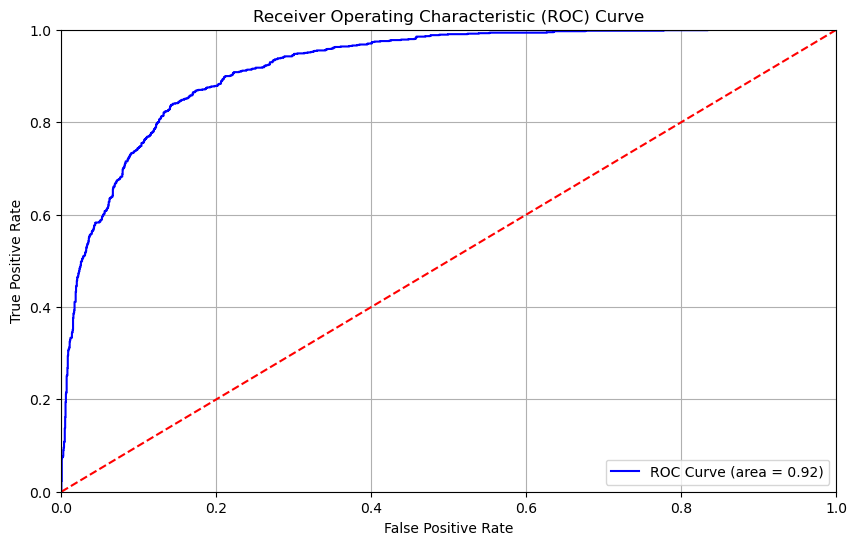

In [62]:
# Plotting ROC curve
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

The ROC curve indicates a great performace for the model as it's almost hugging the top-left corner of the plot which's a very good indication

# Attempting to reduce number of features that has the least impact on the model

In [63]:
# Removing the least impactful features to check impact on model performance 
least_impactful_features = ['duis', 
                            'speeding_violations', 
                            'income_upper class', 
                            'credit_score', 
                            'education_university']

# Reducing features in X_train and X_test
X_train_reduced = X_train.drop(columns = least_impactful_features)
X_test_reduced = X_test.drop(columns = least_impactful_features)

# proceed with model training based on feature reduction
logreg.fit(X_train_reduced, y_train)
y_pred_reduced = logreg.predict(X_test_reduced)

# Evaluate performance
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)

print("Accuracy with Reduced Features:", accuracy_reduced)

# Generating cofusion matrix for the reduced features set
conf_matrix_reduced = confusion_matrix(y_test, y_pred_reduced)
print("Confustion Martrix with Reduced Features:", conf_matrix_reduced)

#Generating Classification report
class_report_reduced = classification_report(y_test, y_pred_reduced)
print("Classification Report with Reduced Features", class_report_reduced)

Accuracy with Reduced Features: 0.855
Confustion Martrix with Reduced Features: [[1878  185]
 [ 250  687]]
Classification Report with Reduced Features               precision    recall  f1-score   support

           0       0.88      0.91      0.90      2063
           1       0.79      0.73      0.76       937

    accuracy                           0.85      3000
   macro avg       0.84      0.82      0.83      3000
weighted avg       0.85      0.85      0.85      3000



The model showed a little improvement to no improvement after dropping the least impactful feature, which gives us indication that is was a successful process to simplify the model and reduce probability of over fitting

# Validating the reduced model

In [64]:
# Checking ROC AUC for reduced sets
y_proba_reduced = logreg.predict_proba(X_test_reduced)[:, 1]
roc_auc_reduced = roc_auc_score(y_test, y_proba_reduced)

print("ROC AUC Score:", roc_auc_reduced)

ROC AUC Score: 0.922782148863624


Again, no significant difference between the old and the reduced ROC scores

In [65]:
# Calculate p-values using statsmodels
X_train_reduced_sm = sm.add_constant(X_train_reduced)  # Add constant for intercept
logit_model = sm.Logit(y_train, X_train_reduced_sm)  # Fit logistic model
result = logit_model.fit()  # Fit the model

# Print the summary which includes coefficients and p-values
print(result.summary())

         Current function value: 0.323861
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6981
Method:                           MLE   Df Model:                           18
Date:                Thu, 17 Oct 2024   Pseudo R-squ.:                  0.4794
Time:                        14:34:05   Log-Likelihood:                -2267.0
converged:                      False   LL-Null:                       -4354.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.5884      0.157     -3.752      0.000      -0.896      -0.281
age                 

/Users/wisthof/Desktop/anakonda_installation/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Reviewing and obtimizing the reduced model

In [66]:
# Review and obtimize hyperparameters
# Import required library
from sklearn.model_selection import GridSearchCV

#Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [1000]
}

# Set up gridsearchCV
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, scoring= 'accuracy', cv=5)

# Fitting the model
grid_search.fit(X_train_reduced, y_train)

# Best params
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Best score
best_score = grid_search.best_score_
print("Best Cross-Validation Score:", best_score)

Best Hyperparameters: {'C': 10, 'max_iter': 1000, 'solver': 'newton-cg'}
Best Cross-Validation Score: 0.8532857142857143


# Saving the training model

In [68]:
from joblib import load

# Load the model using joblib
model = load('final_logistic_regression_model.pkl')